In [36]:
#looking at puma kd benchmark 
import pandas as pd
from processing_functions import *

In [37]:
deseq_values = pd.read_csv('../processing_pipeline/merged_replicates/deseq_new_smaller_psuedoreplicate_autotune.csv')
deseq_values = deseq_values.rename(columns = {'Unnamed: 0': 'PPI'})

In [38]:
puma_kds = pd.read_csv('./benchmark_values_misc/puma_kds.csv', sep = ',')
puma_kds = puma_kds.dropna()

In [39]:
puma_kds['PPI'] = puma_kds.Binder.apply(lambda x: make_ppi(x, 'MCL1'))
puma_kds['kd'] = puma_kds[' Kd'].apply(lambda x: float(x.split('±')[0].strip()))
puma_kds['kd_err'] = puma_kds[' Kd'].apply(lambda x: float(x.split('±')[1].strip()))
graph_df = puma_kds.merge(deseq_values, on = 'PPI', how = 'inner')

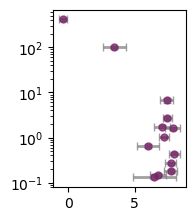

(13, 13, 0.66, -0.29)
(13, 13, 0.89, -0.29)


In [41]:

on_targets = "#ffcc00ff"
off_targets = "#782167ff"
f, ax = plt.subplots()
plt.errorbar(y = graph_df['kd'],
             x = graph_df['ashr_log2FoldChange_HIS_TRP'], 
             xerr= graph_df['ashr_lfcSE_HIS_TRP'], 
             yerr = graph_df['kd_err'],
             fmt="o", elinewidth = 2, alpha = 0.75, color = off_targets, capsize = 3, markersize = 5, ecolor = 'gray')
plt.yscale('log')
plt.tight_layout()
f.set_size_inches(1.5,2)
plt.savefig('./figures/' + 'puma_values.svg', dpi = 300)
plt.show()

print(get_correls(graph_df, 'ashr_log2FoldChange_HIS_TRP', 'kd', log=True))
print(get_correls(graph_df, 'ashr_log2FoldChange_HIS_TRP', 'kd', log=False))

